<a href="https://colab.research.google.com/github/ft10101/AI-ML/blob/main/Plant_Disease_Detection_using_keras_(Apples).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Peerzada Sameem Makhdoomi </h1>
<h2>Central Universiy Of Kashmir</h2>
<H2>Project 1</H2>
This project aims to classify images of apple tree leaves into different categories based on the type of apple tree they belong to. The study utilizes several deep learning models, including Multi Layer Perceptron (MLP), Basic Convolutional Neural Network (CNN), VGG, and AlexNet to make predictions on the image data. The performance of each model was evaluated on a test dataset and the best model was selected based on its training loss and accuracy. The results of this project can be seen in the accompanying notebook, where the training loss and accuracy graphs are attached for visualization. The results of this project could have practical applications in the field of plant disease diagnosis and agronomy.

In [1]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas
od.download("https://www.kaggle.com/datasets/sohaibalam67/apple-disease")

100%|██████████| 90.1M/90.1M [00:01<00:00, 61.8MB/s]


In [3]:
!ls

apple-disease  kaggle.json  sample_data


In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
data_dir1 = '/content/apple-disease/Apple/Apple___Apple_scab'

images1 = [img1 for img1 in os.listdir(data_dir1) if img1.endswith('.JPG')]

images_data1 = []
for image1 in images1:
    img1 = Image.open(os.path.join(data_dir1, image1))
    img1 = img1.resize((150, 150))
    img_arr1 = np.array(img1, dtype='float32') / 255.
    images_data1.append(img_arr1)

images_data1 = np.array(images_data1)

In [6]:
print(len(images_data1))

630


In [7]:
data_dir2 = '/content/apple-disease/Apple/Apple___Black_rot'

images2 = [img2 for img2 in os.listdir(data_dir2) if img2.endswith('.JPG')]

images_data2 = []
for image2 in images2:
    img2 = Image.open(os.path.join(data_dir2, image2))
    img2 = img2.resize((150, 150))
    img_arr2 = np.array(img2, dtype='float32') / 255.
    images_data2.append(img_arr2)

images_data2 = np.array(images_data2)

In [8]:
print(len(images_data2))

621


In [9]:
data_dir3 = '/content/apple-disease/Apple/Apple___Cedar_apple_rust'

images3 = [img3 for img3 in os.listdir(data_dir3) if img3.endswith('.JPG')]

images_data3 = []
for image3 in images3:
    img3 = Image.open(os.path.join(data_dir3, image3))
    img3 = img3.resize((150, 150))
    img_arr3 = np.array(img3, dtype='float32') / 255.
    images_data3.append(img_arr3)

images_data3 = np.array(images_data3)

In [10]:
print(len(images_data3))

275


In [11]:
data_dir4 = '/content/apple-disease/Apple/Apple___healthy'

images4 = [img4 for img4 in os.listdir(data_dir4) if img4.endswith('.JPG')]

images_data4 = []
for image4 in images4:
    img4 = Image.open(os.path.join(data_dir4, image4))
    img4 = img4.resize((150, 150))
    img_arr4 = np.array(img4, dtype='float32') / 255.
    images_data4.append(img_arr4)

images_data4 = np.array(images_data4)

In [12]:
print(len(images_data4))

1645


In [13]:
print('Apple scab:',len(images1))
print('apple black rot:',len(images2))
print('Apple Cedar rust:',len(images3))
print('Healthy apples:',len(images4))

Apple scab: 630
apple black rot: 621
Apple Cedar rust: 275
Healthy apples: 1645


In [14]:
# Split the data into training and testing sets
train_images = np.concatenate((images_data1[:int(len(images_data1)*0.8)], images_data2[:int(len(images_data2)*0.8)], images_data3[:int(len(images_data3)*0.8)], images_data4[:int(len(images_data4)*0.8)]))
train_labels = np.concatenate((np.zeros(int(len(images_data1)*0.8)), np.ones(int(len(images_data2)*0.8)), 2*np.ones(int(len(images_data3)*0.8)), 3*np.ones(int(len(images_data4)*0.8))))
test_images = np.concatenate((images_data1[int(len(images_data1)*0.8):], images_data2[int(len(images_data2)*0.8):], images_data3[int(len(images_data3)*0.8):], images_data4[int(len(images_data4)*0.8):]))
test_labels = np.concatenate((np.zeros(len(images_data1)-int(len(images_data1)*0.8)), np.ones(len(images_data2)-int(len(images_data2)*0.8)), 2*np.ones(len(images_data3)-int(len(images_data3)*0.8)), 3*np.ones(len(images_data4)-int(len(images_data4)*0.8))))

  images_data1 is assigned a label of 0<br>
  images_data2 is assigned a label of 1<br>
  images_data3 is assigned a label of 2<br>
  images_data4 is assigned a label of 3<br>

In [15]:
# Convert labels into one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, 4)
test_labels = tf.keras.utils.to_categorical(test_labels, 4)

<H1>Multilayer Perceptron<H1/>

In [35]:
# Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(150, 150, 3)))
model.add(keras.layers.Dense(1289, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # adding dropout layer with a rate of 0.5
model.add(keras.layers.Dense(624, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # adding dropout layer with a rate of 0.5
model.add(keras.layers.Dense(4, activation='softmax'))

In [36]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [37]:
#model.fit(train_images, train_labels, batch_size=32, epochs=50)
history = model.fit(train_images, train_labels, batch_size=32, epochs=50)

Epoch 1/50
80/80 [==============================] - 2s 19ms/step - loss: 0.1737 - accuracy: 0.4854
Epoch 2/50
80/80 [==============================] - 1s 18ms/step - loss: 0.1457 - accuracy: 0.5619
Epoch 3/50
80/80 [==============================] - 1s 15ms/step - loss: 0.1328 - accuracy: 0.6009
Epoch 4/50
80/80 [==============================] - 1s 15ms/step - loss: 0.1259 - accuracy: 0.6301
Epoch 5/50
80/80 [==============================] - 1s 15ms/step - loss: 0.1153 - accuracy: 0.6522
Epoch 6/50
80/80 [==============================] - 1s 15ms/step - loss: 0.1118 - accuracy: 0.6723
Epoch 7/50
80/80 [==============================] - 1s 15ms/step - loss: 0.1064 - accuracy: 0.6857
Epoch 8/50
80/80 [==============================] - 1s 15ms/step - loss: 0.1011 - accuracy: 0.7082
Epoch 9/50
80/80 [==============================] - 1s 15ms/step - loss: 0.0988 - accuracy: 0.7192
Epoch 10/50
80/80 [==============================] - 1s 15ms/step - loss: 0.0933 - accuracy: 0.7326
Epoch 11/

In [38]:
test_los, test_acc = model.evaluate(test_images, test_labels)

20/20 [==============================] - 0s 8ms/step - loss: 0.0331 - accuracy: 0.9181


In [39]:
print('Loss:',test_los*100)
print('Accuracy:',test_acc*100)

Loss: 3.305797278881073
Accuracy: 91.81102514266968


In [40]:
pred_probs = model.predict(test_images)
pred_labels = np.argmax(pred_probs, axis=1)

from sklearn.metrics import classification_report

target_labels = np.argmax(test_labels, axis=1)
print(classification_report(target_labels, pred_labels))

20/20 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       126
           1       0.92      0.90      0.91       125
           2       0.80      0.95      0.87        55
           3       0.96      0.95      0.95       329

    accuracy                           0.92       635
   macro avg       0.89      0.91      0.90       635
weighted avg       0.92      0.92      0.92       635



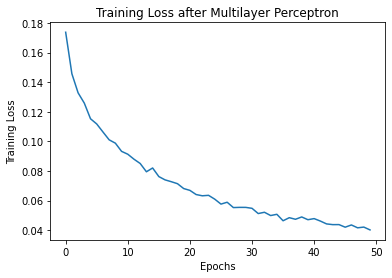

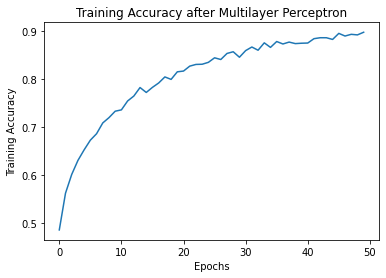

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Training Loss after Multilayer Perceptron')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Training Accuracy after Multilayer Perceptron')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.show()

<H1>Basic CNN architecture<H1/>

In [43]:
import keras
from tensorflow.keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model1 = keras.Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5)) # Add dropout layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5)) # Add dropout layer
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5)) # Add dropout layer
model1.add(Dense(4, activation='softmax'))

# Compile the model
model1.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [44]:
history1 = model1.fit(train_images, train_labels, batch_size=32, epochs=50)

Epoch 1/50
80/80 [==============================] - 3s 28ms/step - loss: 0.1846 - accuracy: 0.3360
Epoch 2/50
80/80 [==============================] - 2s 27ms/step - loss: 0.1744 - accuracy: 0.4933
Epoch 3/50
80/80 [==============================] - 2s 27ms/step - loss: 0.1666 - accuracy: 0.5126
Epoch 4/50
80/80 [==============================] - 2s 27ms/step - loss: 0.1651 - accuracy: 0.5110
Epoch 5/50
80/80 [==============================] - 2s 27ms/step - loss: 0.1650 - accuracy: 0.5138
Epoch 6/50
80/80 [==============================] - 2s 28ms/step - loss: 0.1625 - accuracy: 0.5189
Epoch 7/50
80/80 [==============================] - 2s 28ms/step - loss: 0.1619 - accuracy: 0.5162
Epoch 8/50
80/80 [==============================] - 2s 28ms/step - loss: 0.1614 - accuracy: 0.5174
Epoch 9/50
80/80 [==============================] - 2s 28ms/step - loss: 0.1595 - accuracy: 0.5177
Epoch 10/50
80/80 [==============================] - 2s 28ms/step - loss: 0.1577 - accuracy: 0.5209
Epoch 11/

In [45]:
test_loss, test_accuracy = model1.evaluate(test_images, test_labels)

20/20 [==============================] - 1s 29ms/step - loss: 0.0434 - accuracy: 0.8976


In [46]:
print('Test Loss after CNN:',test_loss*100)
print('Test Accuracy after CNN:',test_accuracy*100)

Test Loss after CNN: 4.339160397648811
Test Accuracy after CNN: 89.76377844810486


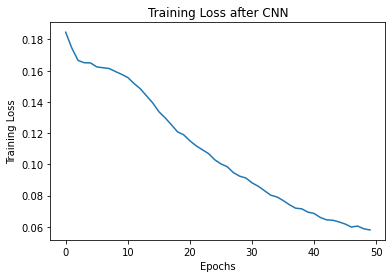

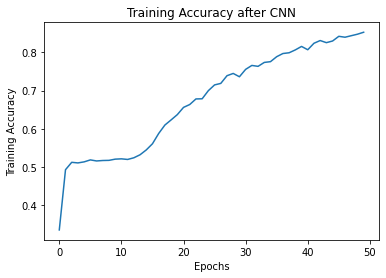

In [49]:
import matplotlib.pyplot as plt

plt.plot(history1.history['loss'])
plt.title('Training Loss after CNN')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

plt.plot(history1.history['accuracy'])
plt.title('Training Accuracy after CNN')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.show()

<H1>AlexNet architecture<H1/>

In [16]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Model

inputs = Input(shape=(150, 150, 3))

# First convolutional layer with max pooling
x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='same')(inputs)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

# Second convolutional layer with max pooling
x = Conv2D(256, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

# Third convolutional layer
x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)

# Fourth convolutional layer
x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)

# Fifth convolutional layer with max pooling
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

# Flatten and pass through dense layer
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)

# Output layer
outputs = Dense(4, activation='softmax')(x)

# Create the model
model2 = Model(inputs, outputs)

In [17]:
# Compile the model
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [24]:
# Fit the model on the training data
history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
80/80 [==============================] - 2s 26ms/step - loss: 0.1545 - accuracy: 0.5189 - val_loss: 0.1521 - val_accuracy: 0.5181
Epoch 2/10
80/80 [==============================] - 2s 23ms/step - loss: 0.1529 - accuracy: 0.5189 - val_loss: 0.1502 - val_accuracy: 0.5181
Epoch 3/10
80/80 [==============================] - 2s 23ms/step - loss: 0.1506 - accuracy: 0.5193 - val_loss: 0.1507 - val_accuracy: 0.5181
Epoch 4/10
80/80 [==============================] - 2s 23ms/step - loss: 0.1477 - accuracy: 0.5221 - val_loss: 0.1432 - val_accuracy: 0.5181
Epoch 5/10
80/80 [==============================] - 2s 23ms/step - loss: 0.1438 - accuracy: 0.5564 - val_loss: 0.1388 - val_accuracy: 0.6157
Epoch 6/10
80/80 [==============================] - 2s 23ms/step - loss: 0.1386 - accuracy: 0.5820 - val_loss: 0.1324 - val_accuracy: 0.6236
Epoch 7/10
80/80 [==============================] - 2s 23ms/step - loss: 0.1342 - accuracy: 0.5927 - val_loss: 0.1252 - val_accuracy: 0.6346
Epoch 8/10
80

In [25]:
test_loss2, test_accuracy2 = model2.evaluate(test_images, test_labels)

20/20 [==============================] - 0s 14ms/step - loss: 0.1108 - accuracy: 0.6709


In [26]:
print('Test Loss after AlexNet:',test_loss2*100)
print('Test Accuracy after AlexNet:',test_accuracy2*100)

Test Loss after AlexNet: 11.082017421722412
Test Accuracy after AlexNet: 67.08661317825317


In [27]:
# Predict classes for test data
predictions = model2.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report
# Generate classification report
print(classification_report(np.argmax(test_labels, axis=1), y_pred))


20/20 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.56      0.20      0.29       126
           1       0.44      0.87      0.58       125
           2       0.00      0.00      0.00        55
           3       0.86      0.89      0.87       329

    accuracy                           0.67       635
   macro avg       0.46      0.49      0.44       635
weighted avg       0.64      0.67      0.62       635



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


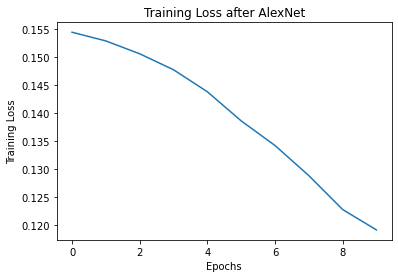

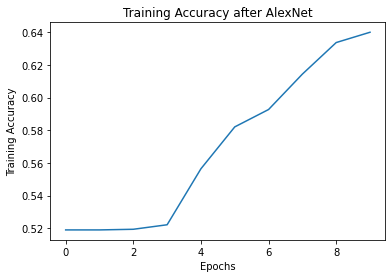

In [35]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'])
plt.title('Training Loss after AlexNet')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

plt.plot(history2.history['accuracy'])
plt.title('Training Accuracy after AlexNet')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.show()

<H1>VGG architecture<H1/>

In [29]:
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Flatten, Dense, Dropout
inputs = Input(shape=(150, 150, 3))

# First block of convolutional layers
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
x3 = MaxPooling2D((2, 2), strides=(2, 2))(x3)
x3 = Dropout(0.5)(x3)

# Second block of convolutional layers
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x3 = MaxPooling2D((2, 2), strides=(2, 2))(x3)
x3 = Dropout(0.5)(x3)

# Third block of convolutional layers
x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x3 = MaxPooling2D((2, 2), strides=(2, 2))(x3)
x3 = Dropout(0.5)(x3)

# Fourth block of convolutional layers
x3 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x3 = MaxPooling2D((2, 2), strides=(2, 2))(x3)
x3 = Dropout(0.5)(x3)

# Fifth block of convolutional layers
x3 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x3 = MaxPooling2D((2, 2), strides=(2, 2))(x3)
x3 = Dropout(0.5)(x3)

# Flatten and pass through dense layer
x3 = Flatten()(x3)
x3 = Dense(4096, activation='relu')(x3)
x3 = Dense(4096, activation='relu')(x3)
x3 = Dropout(0.5)(x3)

# Output layer
outputs = Dense(4, activation='softmax')(x3)

# Create the model
model3 = Model(inputs, outputs)

In [32]:
# Compile the model
model3.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [34]:
# Fit the model on the training data
history3 = model3.fit(train_images, train_labels, epochs=50, batch_size=32)

Epoch 1/50
80/80 [==============================] - 18s 228ms/step - loss: 0.0979 - accuracy: 0.7271
Epoch 2/50
80/80 [==============================] - 19s 233ms/step - loss: 0.0945 - accuracy: 0.7263
Epoch 3/50
80/80 [==============================] - 18s 230ms/step - loss: 0.0919 - accuracy: 0.7350
Epoch 4/50
80/80 [==============================] - 18s 228ms/step - loss: 0.0886 - accuracy: 0.7441
Epoch 5/50
80/80 [==============================] - 18s 228ms/step - loss: 0.0879 - accuracy: 0.7472
Epoch 6/50
80/80 [==============================] - 18s 229ms/step - loss: 0.0868 - accuracy: 0.7528
Epoch 7/50
80/80 [==============================] - 18s 229ms/step - loss: 0.0847 - accuracy: 0.7547
Epoch 8/50
80/80 [==============================] - 18s 229ms/step - loss: 0.0837 - accuracy: 0.7622
Epoch 9/50
80/80 [==============================] - 18s 229ms/step - loss: 0.0852 - accuracy: 0.7626
Epoch 10/50
80/80 [==============================] - 18s 229ms/step - loss: 0.0839 - accura

In [36]:
test_loss3, test_accuracy3 = model3.evaluate(test_images, test_labels)

20/20 [==============================] - 2s 81ms/step - loss: 0.0819 - accuracy: 0.7685


In [37]:
print('Test Loss after VGG:',test_loss3*100)
print('Test Accuracy after VGG:',test_accuracy3*100)

Test Loss after VGG: 8.192316442728043
Test Accuracy after VGG: 76.85039639472961


In [38]:
# Predict classes for test data
predictions3 = model3.predict(test_images)
y_pred = np.argmax(predictions3, axis=1)

from sklearn.metrics import classification_report
# Generate classification report
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

20/20 [==============================] - 2s 77ms/step
              precision    recall  f1-score   support

           0       0.95      0.45      0.61       126
           1       0.71      0.82      0.76       125
           2       0.49      0.35      0.40        55
           3       0.79      0.94      0.86       329

    accuracy                           0.77       635
   macro avg       0.73      0.64      0.66       635
weighted avg       0.78      0.77      0.75       635



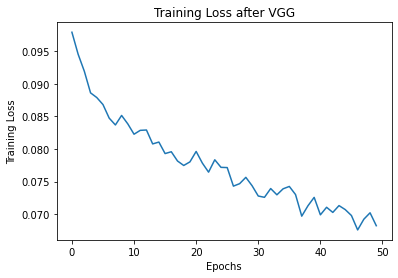

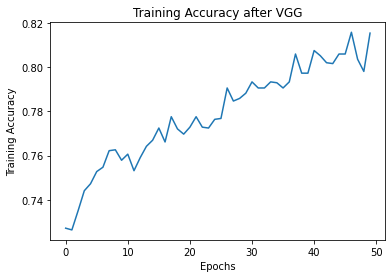

In [39]:
import matplotlib.pyplot as plt

plt.plot(history3.history['loss'])
plt.title('Training Loss after VGG')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

plt.plot(history3.history['accuracy'])
plt.title('Training Accuracy after VGG')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.show()